In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree


In [2]:
attrition=pd.read_csv("../Final-Project/WA_Fn-UseC_-HR-Employee-Attrition.csv")
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#lots of strings in the data so I will use get dummies to convert
dumb_attr = pd.get_dummies(attrition)
dumb_attr.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [4]:
dumb_attr.shape

(1470, 57)

In [5]:
dumb_attr.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gen

In [6]:
#remove the extra columns generated by get dummies
clean_dumb = dumb_attr.drop(columns=['Attrition_No','Gender_Female','Over18_Y','OverTime_No','EmployeeCount'])
clean_dumb.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,1,0,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,1,0,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,1,0,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,0,0,1,0,0


In [7]:
rename_clean=clean_dumb.rename(columns={'JobRole_Healthcare Representative':'JobRole_Healthcare_Representative',
                                       'JobRole_Human Resources':'JobRole_Human_Resources',
                                       'JobRole_Laboratory Technician':'JobRole_Laboratory_Technician',
                                       'JobRole_Manufacturing Director':'JobRole_Manufacturing_Director',
                                       'JobRole_Research Director':'JobRole_Research_Director',
                                       'JobRole_Research Scientist':'JobRole_Research_Scientist',
                                       'JobRole_Sales Executive':'JobRole_Sales_Executive',
                                       'JobRole_Sales Representative':'JobRole_Sales_Representative',
                                       'BusinessTravel_Non-Travel':'BusinessTravel_None'})
rename_clean.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,1,0,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,1,0,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,1,0,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,0,0,1,0,0


In [8]:
rename_clean.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_Yes', 'BusinessTravel_None',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare_Represen

In [9]:
#rename_clean.to_csv('clean.csv')
#saved as new csv for team use if desired

In [10]:
#some basic stats
rename_clean.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,0.282993
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
rename_clean['bins']= pd.cut(rename_clean['MonthlyIncome'], bins=[0,3000,5000,8500,20000], 
                           labels=["LowMonthly", "MidMonthly", "HighMonthly","VhighMonthly"])
rename_clean.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,bins
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,1,0,0,0,1,1,HighMonthly
1,49,279,8,1,2,3,61,2,2,2,...,0,0,1,0,0,0,1,0,0,HighMonthly
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,0,1,1,LowMonthly
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,1,0,0,0,1,0,1,LowMonthly
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,0,1,0,0,MidMonthly


In [12]:
rename_clean['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [13]:
#assign pieces to the model

data=rename_clean

X = data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_None', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development', 
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare_Representative', 'JobRole_Human_Resources',
       'JobRole_Laboratory_Technician', 'JobRole_Manager',
       'JobRole_Manufacturing_Director', 'JobRole_Research_Director',
       'JobRole_Research_Scientist', 'JobRole_Sales_Executive',
       'JobRole_Sales_Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']]
y = data["Attrition_Yes"].values.reshape(-1, 1)

print(X.shape, y.shape)

# there are 1470 total entries with 51 employees attritioned

(1470, 51) (1470, 1)


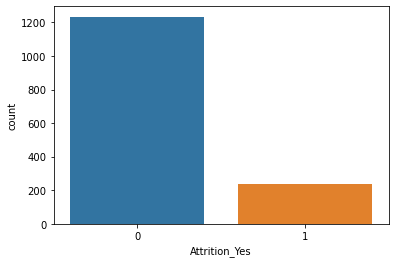

In [14]:
sns.countplot(data['Attrition_Yes'])

In [15]:
#train the model using a seed

from sklearn.model_selection import train_test_split
seed=24

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [16]:
#scale and fit

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [17]:
#transform the data to use the trained

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [18]:
#linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

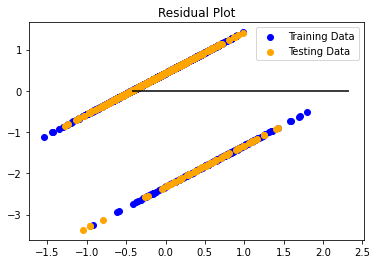

In [19]:
#predictions using the fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()

plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")

plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)


print(f"MSE: {mse}, R2: {r2}")

MSE: 0.9044692968147985, R2: 0.18081557324025266


In [21]:
# Lasso Model

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.07).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {mse}, R2: {r2}")

MSE: 0.9798063909147332, R2: 0.11258221865172535


In [22]:
# Ridge Model

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.07).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {mse}, R2: {r2}")

MSE: 0.9048511498228511, R2: 0.18046972619092816


In [23]:
# ElasticNet model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.07).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {mse}, R2: {r2}")

MSE: 0.9193370057502221, R2: 0.16734978101890574


In [24]:
# Decision Tree Classifier

dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

dtc.score(X_test, y_test)

0.7554347826086957

In [25]:
# Stroll through the random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = seed)
rf = rf.fit(X_train, y_train.ravel())
rf.score(X_test, y_test)

0.842391304347826

In [26]:
importances=rf.feature_importances_
importances

array([0.04992503, 0.0508845 , 0.03912072, 0.01818935, 0.04806613,
       0.02340926, 0.04044926, 0.0212411 , 0.01958033, 0.02735547,
       0.08027652, 0.04939133, 0.02731817, 0.0326897 , 0.0039966 ,
       0.0203048 , 0.        , 0.02377095, 0.04443199, 0.02812613,
       0.01928324, 0.03764096, 0.02448802, 0.02374912, 0.02874245,
       0.00405082, 0.01378279, 0.00792749, 0.00144465, 0.01105228,
       0.01020127, 0.00218561, 0.00686459, 0.00545856, 0.00751777,
       0.00128894, 0.00623328, 0.00859923, 0.00406279, 0.00221756,
       0.00910989, 0.00171503, 0.00306969, 0.00114146, 0.00646938,
       0.0074829 , 0.00763708, 0.00645199, 0.00781399, 0.01272822,
       0.0610616 ])

In [27]:
# Find where the model puts its weight(s)

feature_names=data.columns
test=sorted(zip(importances, feature_names), reverse=True)

In [28]:
#test
#len(feature_names)

In [29]:
from pandas import DataFrame

importances_df = pd.DataFrame(test)
importances_df.columns=['Weight(Uncertinty)','Feature']
importances_df=importances_df.set_index('Feature')

importances_df

,Weight(Uncertinty)
Feature,
MonthlyIncome,0.080277
MaritalStatus_Single,0.061062
DailyRate,0.050885
Age,0.049925
MonthlyRate,0.049391
EmployeeNumber,0.048066
TotalWorkingYears,0.044432
HourlyRate,0.040449
DistanceFromHome,0.039121


In [30]:
#importances_df.plot.bar()

In [31]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=seed)
clf.fit(X_train, y_train.ravel())

clf.predict(X_test[:2])

clf.score(X_test, y_test)

0.8505434782608695

In [32]:
#tensor flow and one hot encoding
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
